# List of empirical facts

1. Fact group 0: `splitnet_posenc__enc=128` beats `siren_baseline` on cameraman

# Fact group 0

Questions:

1. Is there a setup where splitnet is better?

Yes.

[splitnet](https://wandb.ai/kilianovski/01_splitnet__cameraman/runs/2m0bmqpi) vs [siren](https://wandb.ai/kilianovski/01_splitnet__cameraman/runs/vbqf3o9u?workspace=user-kilianovski)

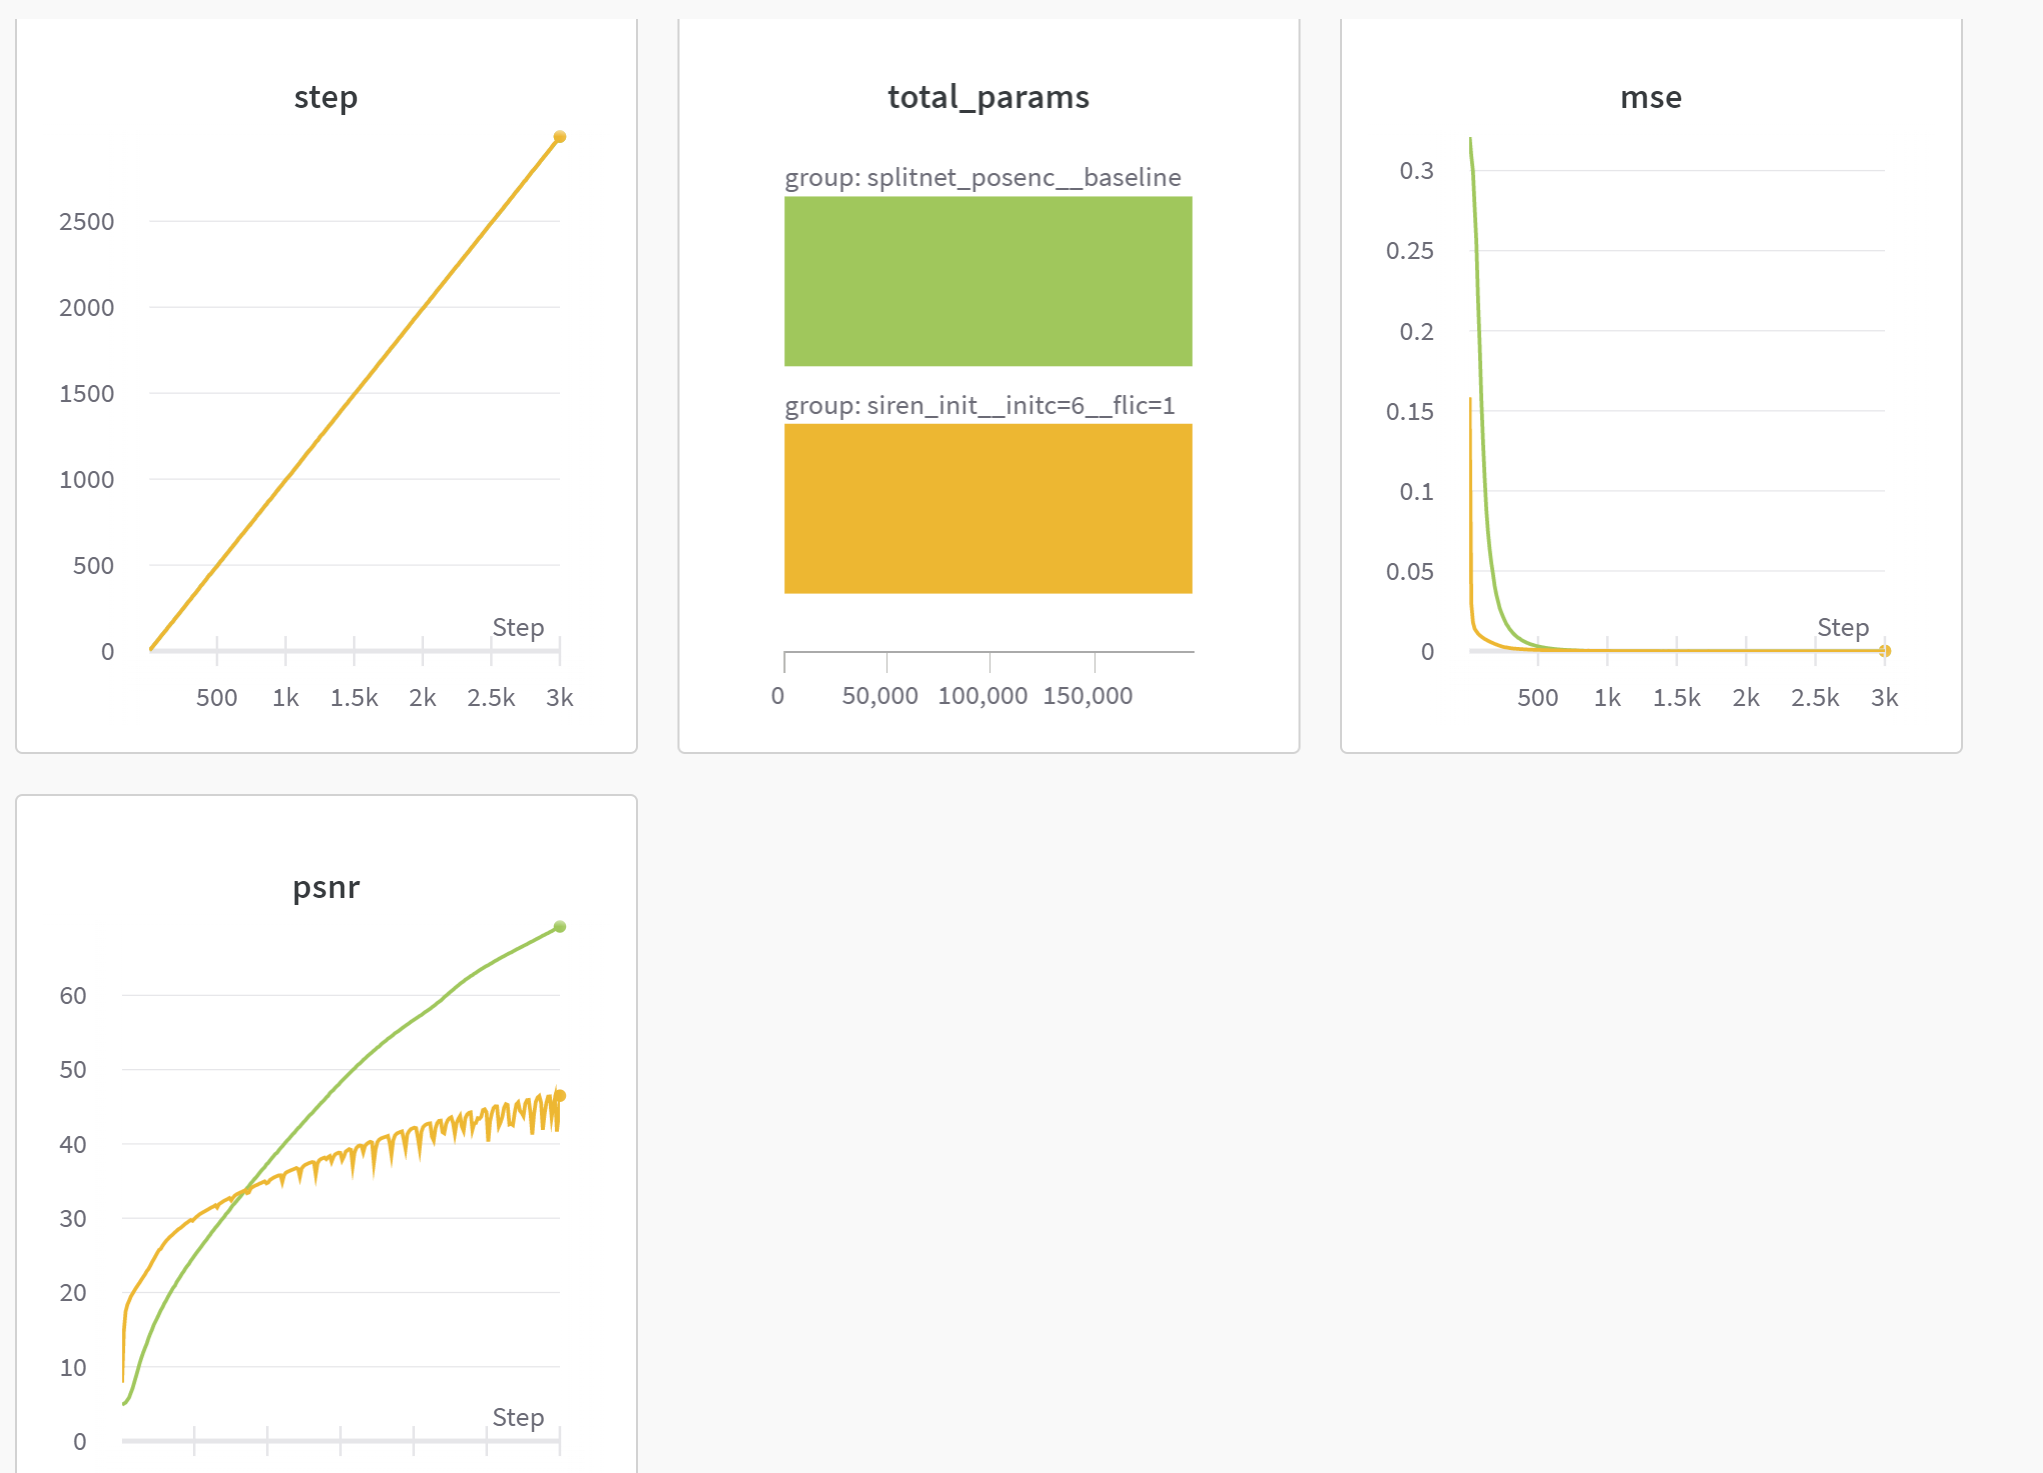

2. Does the same net setup works better on color image?

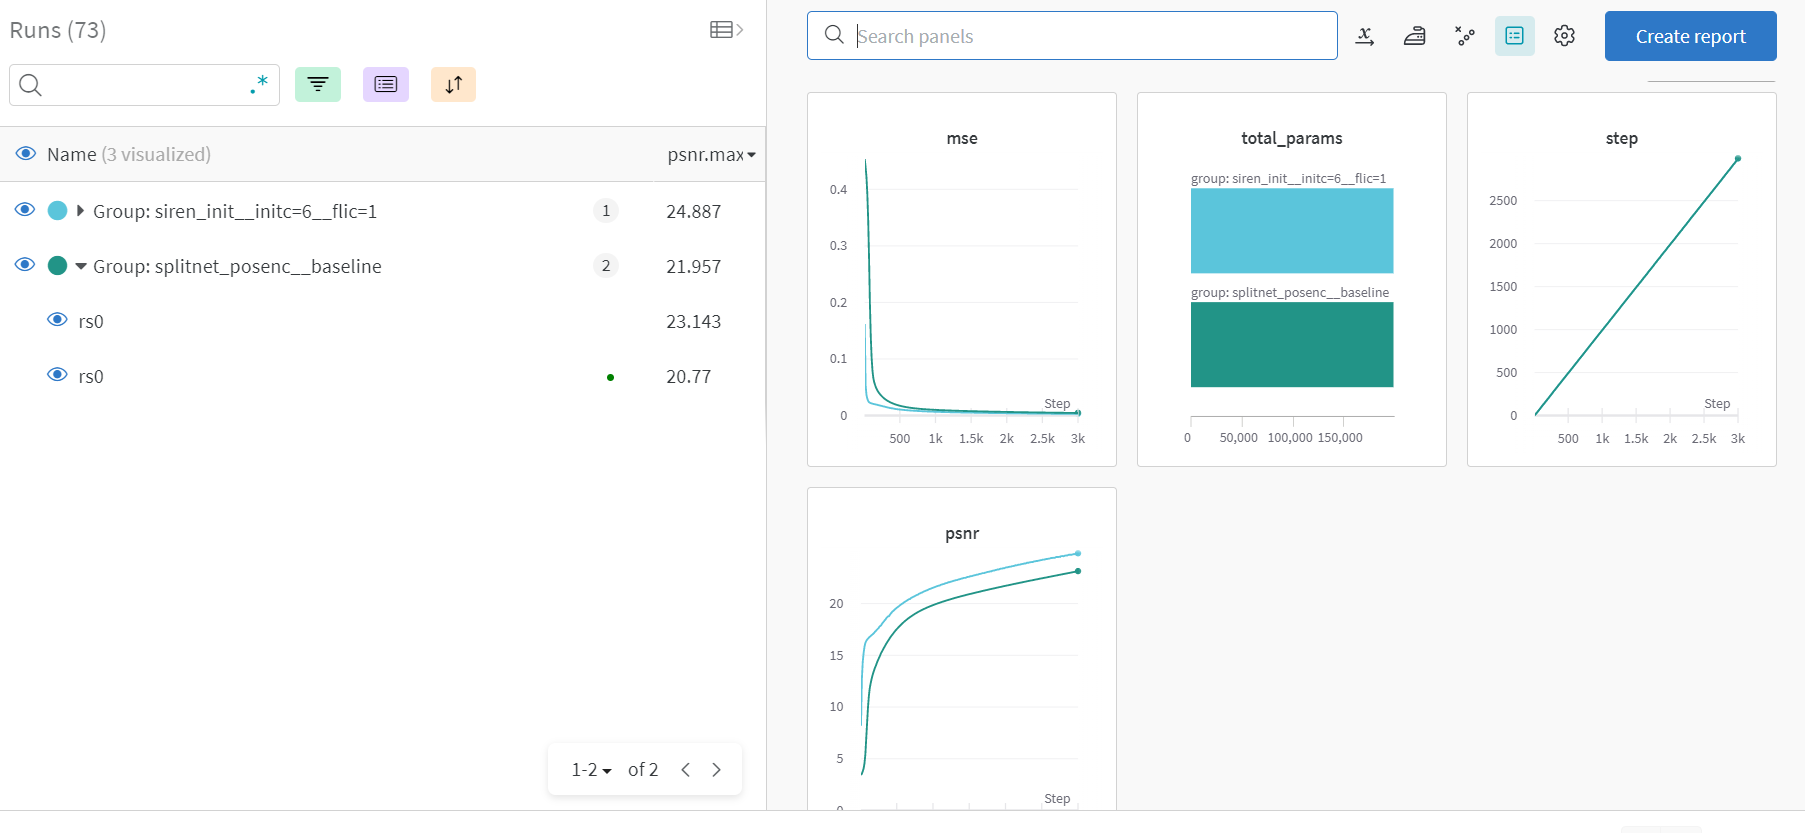

## Setup code

In [1]:
from train_pipeline import train

import os
import torch
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from hydra.utils import instantiate
from omegaconf import OmegaConf


def load_cfg(overrides=()):
    # with initialize_config_dir(config_dir="/app/notebooks/draft_02/conf"):
    with initialize(version_base=None, config_path="./conf"):
        cfg = compose(config_name='config', overrides=list(overrides))
        return cfg

from IPython.display import clear_output

## Experiments code

In [4]:
256*256

65536

image: cameraman
image_dir: ../../data
image_W: 512
use_wandb: true
is_debug: false
total_steps: 3000
random_seed:
- 0
model:
  _target_: spellbook.siren.model.Siren
  in_features: 2
  out_features: none
  hidden_features: 256
  hidden_layers: 3
  init_c: 6
  first_layer_init_c: 1
  outermost_linear: true
logging:
  logger:
    _target_: spellbook.logging.wandb.WandbLogger
    project: 01_splitnet__${image}
  steps_till_summary: 500
  experiment_name: bs=10k_siren_init__initc=6__flic=1
optimizer:
  _target_: torch.optim.AdamW
  weight_decay: 0.0
  lr: 0.0001
batch_size: 10000
device: cuda:0

Setting seed to 0


mse,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
psnr,▁▂▂▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▆▇▇▇▇█▇▇██
step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
total_params,▁
step,2999
total_params,198401


********************************************************************************


image: cameraman
image_dir: ../../data
image_W: 512
use_wandb: true
is_debug: false
total_steps: 3000
random_seed:
- 0
model:
  _target_: spellbook.siren.model.Siren
  in_features: 2
  out_features: none
  hidden_features: 256
  hidden_layers: 3
  init_c: 6
  first_layer_init_c: 1
  outermost_linear: true
logging:
  logger:
    _target_: spellbook.logging.wandb.WandbLogger
    project: 01_splitnet__${image}
  steps_till_summary: 500
  experiment_name: bs=10k_siren_init__initc=6__flic=1
optimizer:
  _target_: torch.optim.AdamW
  weight_decay: 0.0
  lr: 0.0001
batch_size: 10000
device: cuda:0


********************************************************************************
+---------------------+------------+
|       Modules       | Parameters |
+---------------------+------------+
| net.0.linear.weight |    512     |
|  net.0.linear.bias  |    256     |
| net.1.linear.weight |   65536    |
|  net.1.linea

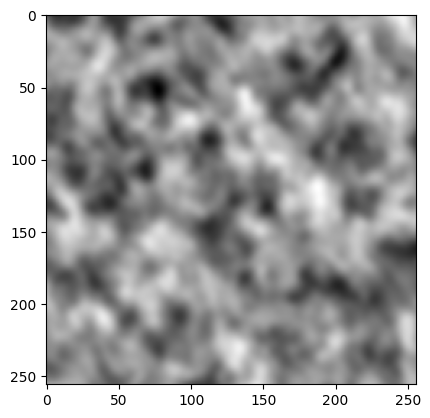

model_input.shape torch.Size([1, 65536, 2])
model_input_batch.shape torch.Size([1, 10000, 2])
Step 500, Total loss 0.001655


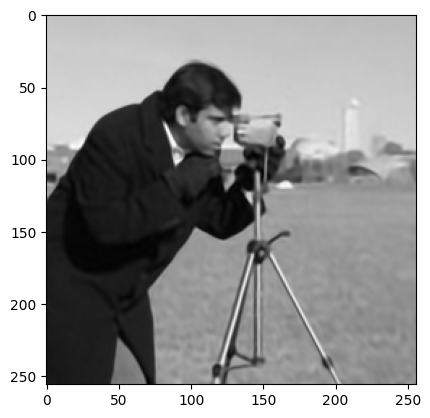

Step 1000, Total loss 0.000788


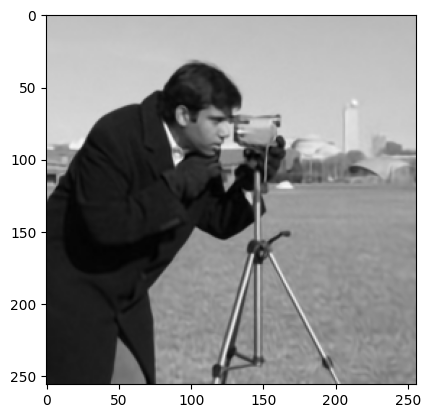

Step 1500, Total loss 0.000449


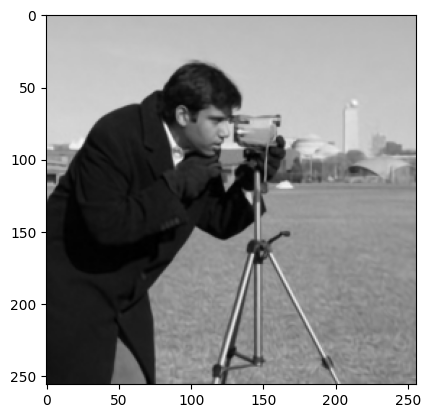

Step 2000, Total loss 0.000333


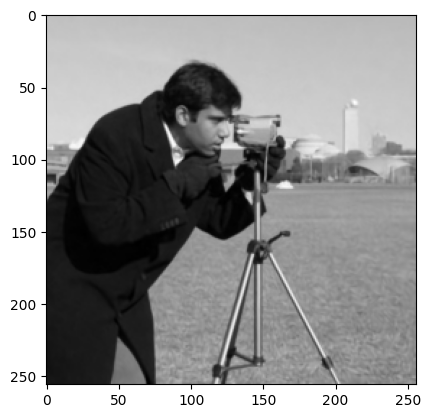

Step 2500, Total loss 0.000262


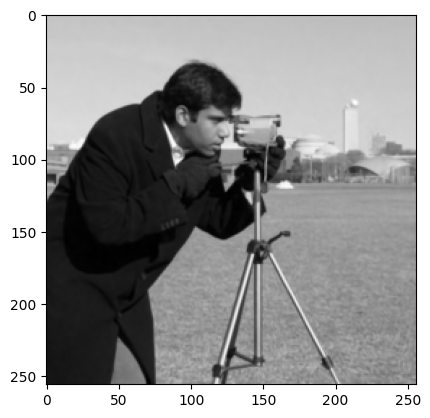

In [6]:
cfg = load_cfg(overrides=[
    "+exp=00_siren_init",
    "random_seed=[0]",
    "+batch_size=10000",
    "image=cameraman",
    # 'optimizer._target_=torch.optim.SGD',
    "+device=cuda:0",
])

cfg.logging.experiment_name = 'bs=10k_' + cfg.logging.experiment_name

print(OmegaConf.to_yaml(cfg))
train(cfg)

In [3]:
break

SyntaxError: 'break' outside loop (668683560.py, line 4)

In [8]:
cfg = load_cfg(overrides=[
    "+exp=01_splitnet_posenc",
    "random_seed=[0]",
    # "image=cameraman",
    "+batch_size=50000",
    "+device=cuda:0",
])
cfg.model

{'_target_': 'spellbook.parallel.ParallelSplitNet', 'model_configs': [{'hidden_layers': [128, 128], 'm': [10.0, 10.0, 1.0]}]}

image: tokyo512.png
image_dir: ../../data
image_W: 512
use_wandb: true
is_debug: false
total_steps: 3000
random_seed:
- 0
model:
  _target_: spellbook.parallel.ParallelSplitNet
  model_configs:
  - hidden_layers:
    - 128
    - 128
    m:
    - 10.0
    - 10.0
    - 1.0
logging:
  logger:
    _target_: spellbook.logging.wandb.WandbLogger
    project: 01_splitnet__${image}
  steps_till_summary: 500
  experiment_name: bs=50k_splitnet_posenc__baseline
optimizer:
  _target_: torch.optim.AdamW
  weight_decay: 0.0
  lr: 0.0001
batch_size: 50000
device: cuda:0

Setting seed to 0


mse,█▅▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
psnr,▁▂▃▃▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇██▇██████████
step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
total_params,▁
step,2999
total_params,198401


********************************************************************************


image: tokyo512.png
image_dir: ../../data
image_W: 512
use_wandb: true
is_debug: false
total_steps: 3000
random_seed:
- 0
model:
  _target_: spellbook.parallel.ParallelSplitNet
  model_configs:
  - hidden_layers:
    - 128
    - 128
    m:
    - 10.0
    - 10.0
    - 1.0
logging:
  logger:
    _target_: spellbook.logging.wandb.WandbLogger
    project: 01_splitnet__${image}
  steps_till_summary: 500
  experiment_name: bs=50k_splitnet_posenc__baseline
optimizer:
  _target_: torch.optim.AdamW
  weight_decay: 0.0
  lr: 0.0001
batch_size: 50000
device: cuda:0


********************************************************************************
+--------------------------------+------------+
|            Modules             | Parameters |
+--------------------------------+------------+
| networks.0.net.0.linear.weight |   131072   |
|  networks.0.net.0.linear.bias  |    512     |
| networks.0.net.1.linear.weight 

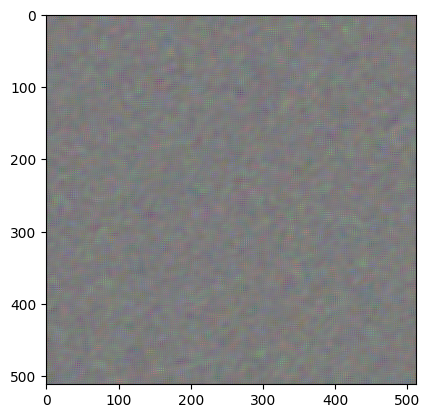

model_input.shape torch.Size([1, 262144, 2])
model_input_batch.shape torch.Size([1, 50000, 2])
Step 500, Total loss 0.019349


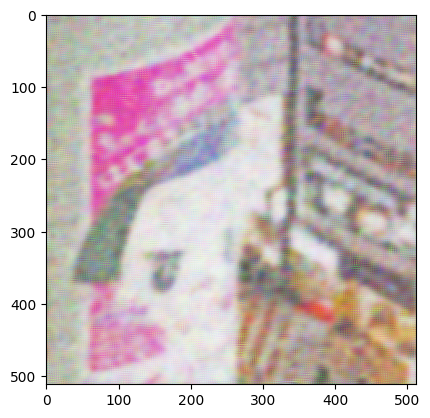

Step 1000, Total loss 0.011272


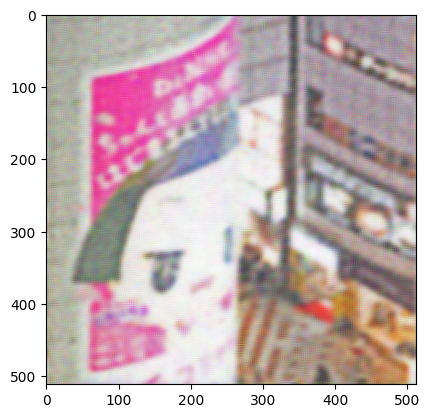

Step 1500, Total loss 0.008855


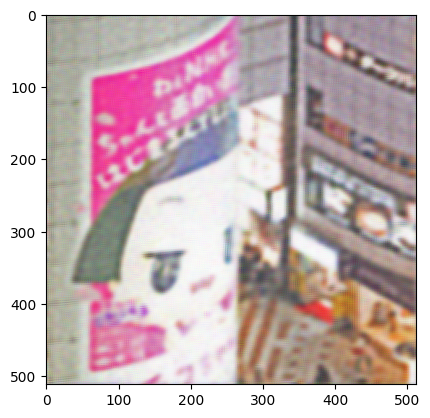

Step 2000, Total loss 0.007665


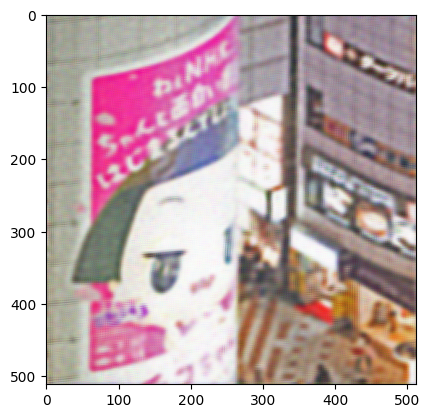

Step 2500, Total loss 0.006727


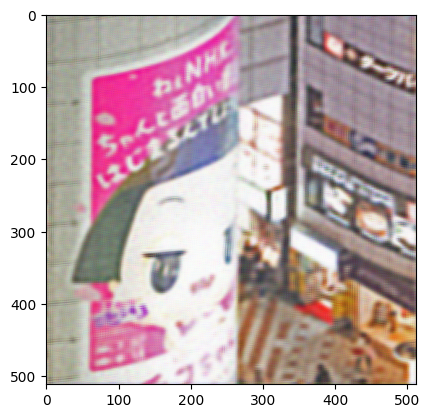

In [7]:
cfg = load_cfg(overrides=[
    "+exp=01_splitnet_posenc",
    "random_seed=[0]",
    # "image=cameraman",
    "+batch_size=50000",
    "+device=cuda:0",
])

cfg.logging.experiment_name = 'bs=50k_' + cfg.logging.experiment_name

print(OmegaConf.to_yaml(cfg))
train(cfg)

In [ ]:
# old_cfg = """
# image: cameraman
# image_dir: ../../data
# image_W: 512
# use_wandb: true
# is_debug: false
# total_steps: 3000
# random_seed:
# - 42
# model:
#   _target_: spellbook.splitnet.SplitNetPosEncOmegas
#   in_features: 2
#   encoding_size: 128
#   hidden_features: 128
#   hidden_layers: 1
#   outermost_linear: false
#   m:
#   - 10.0
#   - 10.0
#   - 1.0
# logging:
#   logger:
#     _target_: spellbook.logging.wandb.WandbLogger
#     project: 01_splitnet__${image}
#   steps_till_summary: 500
#   experiment_name: splitnet_posenc__enc=${model.encoding_size}
# optimizer:
#   _target_: torch.optim.AdamW
#   weight_decay: 0.0
#   lr: 0.0001
# device: cuda:1
# """

# cfg = OmegaConf.create(old_cfg)
# # train(cfg)